# import librarie

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading data

In [50]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
data.shape

(1338, 7)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Preprossecing

l'instruction precedante nous montre qu'il y'a des colonnes qui ne sont pas des numeriques. il va falloir encoder ces valeurs.

In [53]:
data.isnull().sum()#verifier s'il y'a des valeurs nulle ou pas

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipykernel_39961/3501108668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


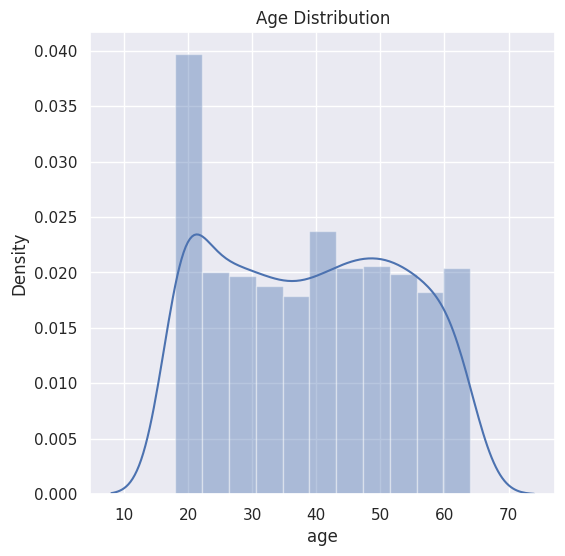

In [55]:
#understand the distribution of each feature
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.show()

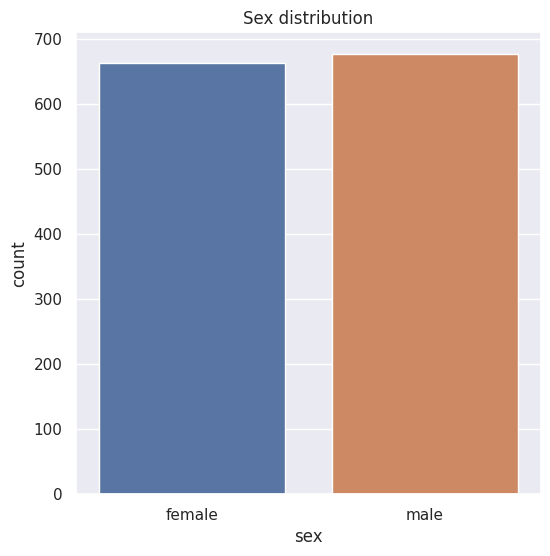

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=data)
plt.title("Sex distribution")
plt.show()

In [57]:
data["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

/tmp/ipykernel_39961/2292083126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["bmi"])


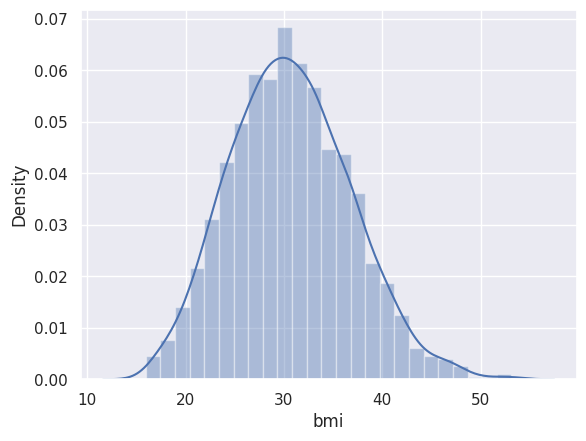

In [58]:
sns.distplot(data["bmi"])
plt.show()

In [59]:
# comprenons la distribution a propos de la region
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [60]:
# Encodage de ces valeurs
data.replace({"sex":{'male':0,'female':1}},inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [61]:
data.replace({'smoker':{'no':1,'yes':0},'region':{'southeast':0,'southwest':1,'northwest':3,'northeast':2}},inplace=True)

# split features and label from the dataset

In [62]:
features = data.drop(columns="charges",axis=1)
label = data["charges"]

# Split data to training and test set

In [63]:
features_train,features_test,label_train,label_test = train_test_split(features,label,test_size=0.2)
features_train.shape

(1070, 6)

# Train model

In [64]:
model = LinearRegression()
model.fit(features_train,label_train)

LinearRegression()

# Evaluation du model

In [65]:
label_prediction = model.predict(features_train)
r2_train = metrics.r2_score(label_prediction,label_train)
r2_train

0.652827451686545

In [66]:
label_prediction_test = model.predict(features_test)
r2_test = metrics.r2_score(label_prediction_test,label_test)
r2_test

0.6536938813781579

In [ ]:
data.info()

# Pour une donnee fournie

In [68]:
sample_input_data = (30,1,22.7,0,1,0)
input_data_as_numpy = np.asarray(sample_input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

In [70]:
input_prediction = model.predict(input_data_reshaped)
print(input_prediction[0])

2679.2780628504424


/home/benjojo/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
